In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
#Read the csv file and store in data frame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [4]:
#Read ride data and store in data frame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [5]:
#Explore Data Frame
#get columns and rows
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
#Check for null values
city_data_df.isnull().sum()


city            0
driver_count    0
type            0
dtype: int64

In [7]:
#Get data types
city_data_df.dtypes


city            object
driver_count     int64
type            object
dtype: object

In [8]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#Get the number of data points for "urban"
sum(city_data_df["type"]=="Urban")

66

In [10]:
#suburban
sum(city_data_df["type"]=="Suburban")

36

In [12]:
sum(city_data_df["type"]=="Rural")

18

In [14]:
#Inspect ride data
ride_data_df.count()
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
#merge Dataframes
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on=["city", "city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [20]:
#data Frames for City Types
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [21]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [23]:
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [26]:
#Get ride counts by using groupby()
#Urban
urban_ride_count_ds = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count_ds.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [27]:
#Suburban
suburban_ride_count_ds = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count_ds.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [28]:
#Rural
rural_ride_count_ds = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count_ds.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [29]:
#get average fare amount by city 
urban_avg_fare_ds = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare_ds.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [30]:
#Suburban avg
suburban_avg_fare_ds = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare_ds.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [31]:
#Rural avg
rural_avg_fare_ds = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare_ds.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [32]:
#get average numbers of drivers per city
urban_avg_drivers_ds = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_avg_drivers_ds.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [34]:
#suburban
suburban_avg_drivers_ds = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_avg_drivers_ds.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [35]:
#rural
rural_avg_drivers_ds = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_avg_drivers_ds.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

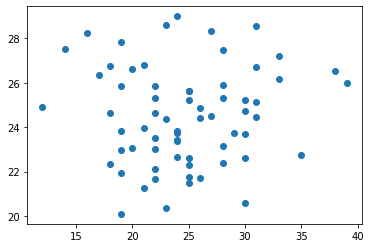

In [36]:
#Create scatterplots for bubbleplot
plt.scatter(urban_ride_count_ds, urban_avg_fare_ds)
plt.show()

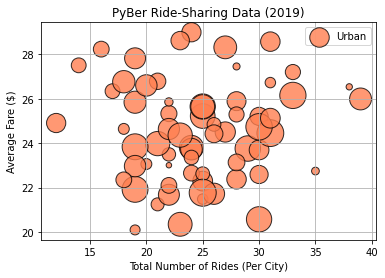

In [45]:
#Add "s=" property to make bubble
plt.scatter(urban_ride_count_ds, urban_avg_fare_ds, color= "coral", edgecolor = "black",linewidths=1, alpha = 0.8,s=10*urban_avg_drivers_ds, label = "Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

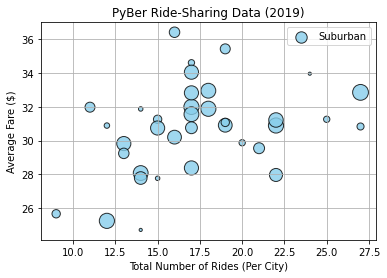

In [47]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count_ds,
      suburban_avg_fare_ds,
      s=10*suburban_avg_drivers_ds, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

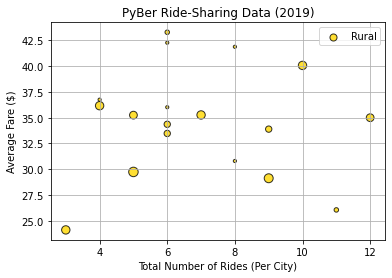

In [48]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count_ds,
      rural_avg_fare_ds,
      s=10*rural_avg_drivers_ds, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

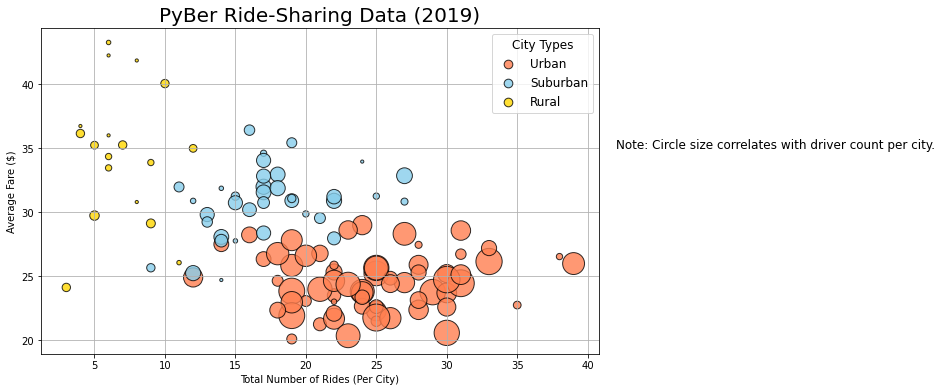

<Figure size 432x288 with 0 Axes>

In [55]:
#Combining scatterplots
# Add the scatter charts for each type of city.
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count_ds,
      urban_avg_fare_ds,
      s=10*urban_avg_drivers_ds, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count_ds,
      suburban_avg_fare_ds,
      s=10*suburban_avg_drivers_ds, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count_ds,
      rural_avg_fare_ds,
      s=10*rural_avg_drivers_ds, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
#Other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
#plt.legend()
#Replace with formatted legend

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Show the plot
plt.show()

# Save the figure.
plt.savefig("analysis/Fig1.png")

In [56]:
#Get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [59]:
# Get summary stats
urban_ride_count_ds.describe()
suburban_ride_count_ds.describe()
rural_ride_count_ds.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [60]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count_ds.mean(),2), round(suburban_ride_count_ds.mean(),2), round(rural_ride_count_ds.mean(),2)

(24.62, 17.36, 6.94)

In [62]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count_ds.median()), round(suburban_ride_count_ds.median(),2), round(rural_ride_count_ds.median(),2)

(24, 17.0, 6.0)

In [66]:
#Calculate mode

urban_ride_count_ds.mode()
suburban_ride_count_ds.mode()
rural_ride_count_ds.mode()

0    17
dtype: int64

In [68]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

#Calculate measures of central tendency
mean_urban_ride_count = np.mean(urban_ride_count_ds)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

The mean for the ride counts for urban trips is 24.62.


In [72]:
median_urban_ride_count = np.median(urban_ride_count_ds)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count_ds)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [73]:
mean_suburban_ride_count = np.mean(suburban_ride_count_ds)
print(f"The mean for the ride counts for urban trips is {mean_suburban_ride_count:.2f}.")
median_suburban_ride_count = np.median(suburban_ride_count_ds)
print(f"The median for the ride counts for urban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count_ds)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for urban trips is 17.36.
The median for the ride counts for urban trips is 17.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([17]), count=array([7])).


In [74]:
mean_rural_ride_count = np.mean(rural_ride_count_ds)
print(f"The mean for the ride counts for urban trips is {mean_rural_ride_count:.2f}.")
median_rural_ride_count = np.median(rural_ride_count_ds)
print(f"The median for the ride counts for urban trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count_ds)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 6.94.
The median for the ride counts for urban trips is 6.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6]), count=array([5])).


In [75]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [76]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")


The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [77]:
# Get the fares for the suburban cities.
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [78]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for urban trips is {mode_suburban_fares}.")


The mean fare price for urban trips is $30.97.
The median fare price for urban trips is $30.75.
The mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [79]:
# Get the fares for the rural cities.
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [80]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for urban trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for urban trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for urban trips is {mode_rural_fares}.")


The mean fare price for urban trips is $34.62.
The median fare price for urban trips is $37.05.
The mode fare price for urban trips is ModeResult(mode=array([37.05]), count=array([2])).


In [83]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [84]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_urban_drivers = np.mean(urban_drivers)

median_urban_drivers = np.median(urban_drivers)

mode_urban_drivers = sts.mode(urban_drivers)


The mean fare price for urban trips is $36.68.
The median fare price for urban trips is $37.05.
The mode fare price for urban trips is ModeResult(mode=array([39]), count=array([86])).


In [87]:
#calc suburban stats
suburban_drivers = suburban_cities_df["driver_count"]
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [91]:
mean_suburban_drivers = np.mean(suburban_drivers)
mean_suburban_drivers
median_suburban_drivers = np.median(suburban_drivers)
median_suburban_drivers
mode_suburban_drivers = sts.mode(suburban_drivers)
mode_suburban_drivers

ModeResult(mode=array([20]), count=array([79]))

In [92]:
rural_drivers = rural_cities_df["driver_count"]
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [96]:
mean_rural_drivers = np.mean(rural_drivers)
mean_rural_drivers
median_rural_drivers = np.median(rural_drivers)
median_rural_drivers
mode_rural_drivers = sts.mode(rural_drivers)
mode_rural_drivers

ModeResult(mode=array([1]), count=array([32]))

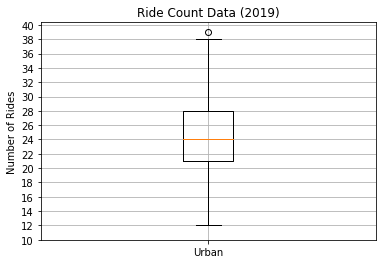

In [98]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count_ds, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

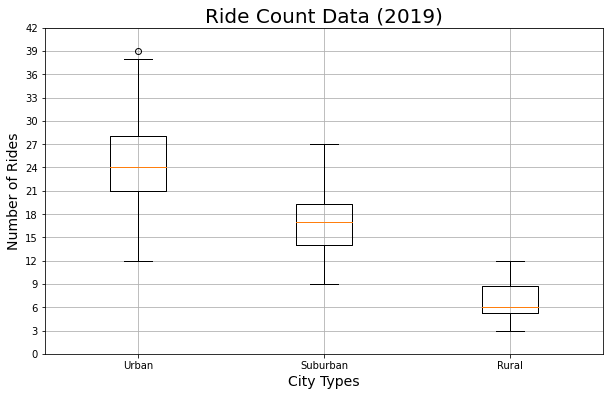

In [99]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count_ds, suburban_ride_count_ds, rural_ride_count_ds]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [100]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count_ds[urban_ride_count_ds==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


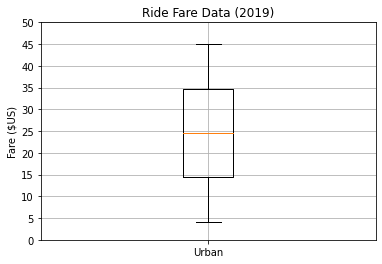

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [103]:
#Create a box and whiskers plot
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($US)")
ax.set_yticks(np.arange(0,51, step = 5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

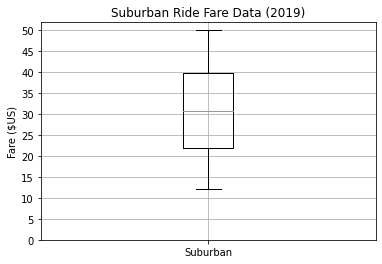

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [105]:
#Create b-w plot for suburban
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
ax.set_title("Suburban Ride Fare Data (2019)")
ax.set_ylabel("Fare ($US)")
ax.set_yticks(np.arange(0,51, step= 5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

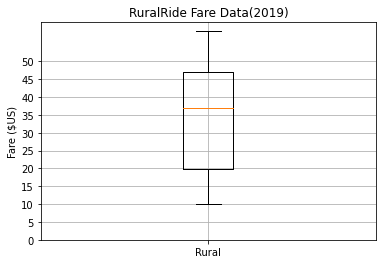

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [106]:
#Create a b-w plot for Rural
x_label = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels= x_label)
ax.set_title("RuralRide Fare Data(2019)")
ax.set_ylabel("Fare ($US)")
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()


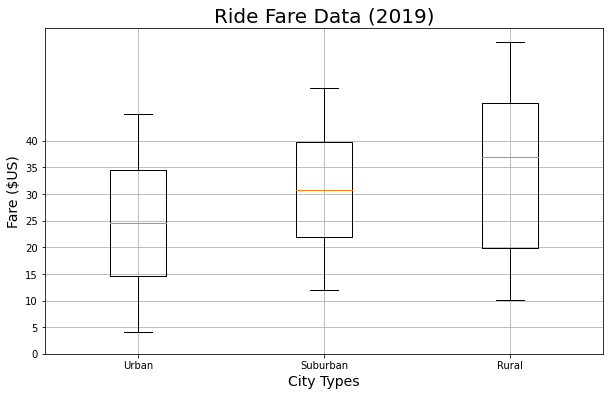

In [113]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($US)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

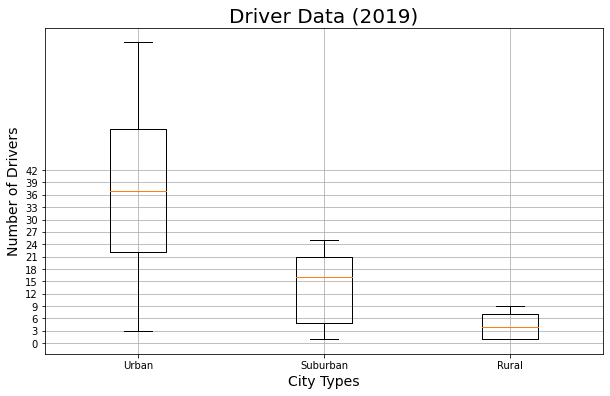

In [116]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

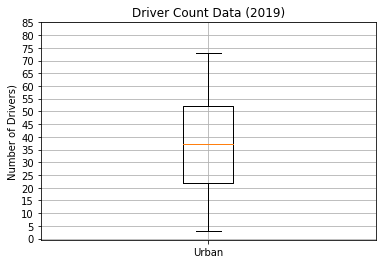

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [114]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()


In [119]:
#Calculating sums for pie chart
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [122]:
#total
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [123]:
#Calculate percentages
type_percents = 100 * sum_fares_by_type/total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

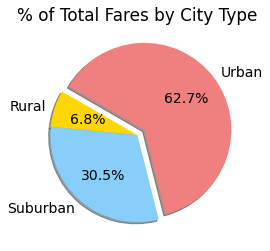

In [155]:
#import mpl to change plot config using rcParams
import matplotlib as mpl
#Build pie chart
plt.pie(type_percents, 
        labels = ["Rural", "Suburban", "Urban"],
        colors =["gold","lightskyblue","lightcoral"],
        explode = [0,0,0.1],
        autopct="%1.1f%%",
        shadow = True, 
        startangle = 150)
plt.title("% of Total Fares by City Type")
#change font size
mpl.rcParams["font.size"] = 14
plt.savefig("analysis/Fig5.png")
plt.show()

In [136]:
#Pie chart for ride data
sum_rides_by_type = pyber_data_df.groupby(["type"]).sum()["ride_id"]
sum_rides_by_type
total_rides_by_type = pyber_data_df["ride_id"].sum()
total_rides_by_type

11607265426974146

In [142]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

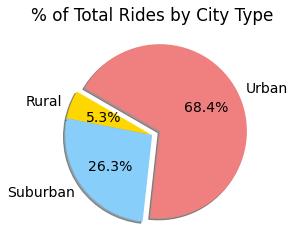

In [143]:
#Build pie chart
plt.pie(ride_percents, 
        labels = ["Rural", "Suburban", "Urban"],
        colors =["gold","lightskyblue","lightcoral"],
        explode = [0,0,0.1],
        autopct="%1.1f%%",
        shadow = True, 
        startangle = 150)
plt.title("% of Total Rides by City Type")
#change font size
mpl.rcParams["font.size"] = 14
plt.savefig("analysis/Fig6.png")
plt.show()

In [150]:
#Calculate Total Drivers by city percentages
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"]/city_data_df["driver_count"].sum() 
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

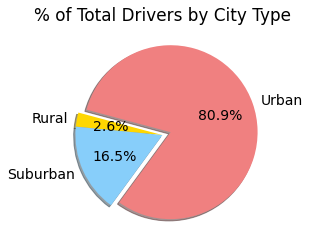

In [156]:
plt.pie(driver_percents, 
        labels = ["Rural", "Suburban", "Urban"],
        colors =["gold","lightskyblue","lightcoral"],
        explode = [0,0,0.1],
        autopct="%1.1f%%",
        shadow = True, 
        startangle = 165)
plt.title("% of Total Drivers by City Type")
#change font size
mpl.rcParams["font.size"] = 14
plt.savefig("analysis/Fig7.png")
plt.show()